# Lab 1 - Task 1

Students: Jannik Wagner (19971213-1433) and Lea Keller (19980209-4889)

Task 1 bonus can be found in [bonus1/problem_1_bonus.ipynb](bonus1/problem_1_bonus.ipynb)

In [1]:
import numpy as np
import maze as mz

# Problem 1: The Maze and the Minotaur

The objective of problem 1 is to leave the maze as quickly as possible without being eaten. We start first by describing the maze as a numpy array. 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

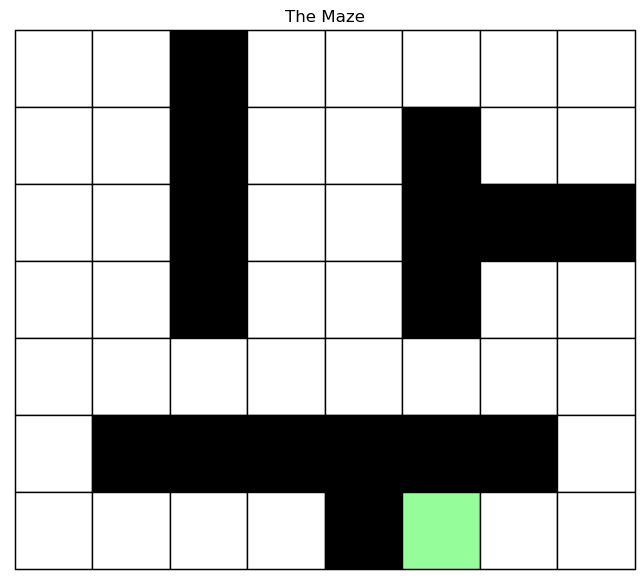

In [3]:
mz.draw_maze(maze)

## Basic Maze

### 1.a) MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
We model the state space as the set of all possible positions of the player and the minotaur in the maze. Note that we exclude state where the player's position is an obstacle since these are impossible states to be in for the player. Formally, the state space is

$$\mathcal{S} = \big\lbrace ((i,j),(k,l)):\textrm{such that the cell
} (i,j) \textrm{ is not an obstacle}\big\rbrace.$$

#### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`). Note that sometimes the player cannot move in a certain direction because of an obstacle or a wall, yet we permit this to be a possible action. We will see that this is not an issue as long as we define our transition probabilities and rewards appropriately.
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$
> **Note:** Once again, the choice of the action space is not unique. For instance one could remove the action `stay` from $\mathcal{A}$, but then one should modify the transition probabilities accordingly as well as the rewards.  


#### Transition probabilities $\mathcal{P}$
Note that there is randomness involved due to the movements of the minotaur.
- If in some state $s=((i,j),(k,l))$ the Minotaur and Player position are the same, i.e., $(i,j)=(k,l)$, the player is eaten and thus the game ended and noone will move anymore, then $\mathbb{P}(s \vert s, a) = 1$.
- If in some state $s=((i,j),(k,l))$ the Minotaur and the player are not in the same position but the player is at the goal position, i.e., $B=(i,j)\ne(k,l)$, the player one and thus the game ended and noone will move anymore, then $\mathbb{P}(s \vert s, a) = 1$.
- If at state $s=((i,j),(k,l))$ we are neither eaten nor at a goal state, i.e., $B\ne(i,j)\ne(k,l)$:
   - If taking action (or move) $a$ does not lead to a wall or an obstacle, then the player position afterward will be $(i',j')\ne(i,j)$. 
   - If, however, taking action (or move) $a$ leads to a wall or an obstacle, the player remains in his position, i.e., $(i',j')=(i,j)$. 
   - Additionally, let $(k'_h, l'_h), h=1,...,n$ be the $n$ different positions to which the minotaur can move without moving into a wall or staying at the same position, but with moving into obstacles. Then $n=2$ for corners, $n=3$ for edges, and $n=4$ else.
   - Then let $s'_h=((i',j'),(k'_h,l'_h)), h=1,...,n$ be the different states we can end up in. Those will all have the same probability, i.e., $\mathbb{P}(s'_h \vert s, a) = \frac{1}{n}, h=1,...,n$.


> **Note**: Recall that for a fixed $s \in \mathcal{S}$ and $a \in \mathcal{A}$ we have $\sum_{s' \in \mathcal{S}} \mathbb{P}(s' \vert s, a) = 1$, thus for all $s' \in \mathcal{S}$, $s \in \mathcal{S}$ and $a \in \mathcal{A}$ not covered above, we have $\mathbb{P}(s' \vert s, a) = 0$.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.   
   - If at state $s$ we are eaten, the reward for all actions $a$ is $r(s,a) = 0$
   - If at state $s$ we are not eaten but at the exit, the reward for all actions $a$ is $r(s,a) = 1$
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = 0$.
> **Note**: Here the rewards are independent of time (i.e. $r_t(.,.) = r(.,.)$). 


#### Implementation
The above MDP formulation is implemented as a class ``maze.Maze`` in the file [maze.py](./maze.py) which given a matrix description of the maze instanciates the state space, action space, transition probabilities and rewards. 

> **Note:** In the class `maze.Maze` each state $s = ((i,j),(k,l))$ is given a unique identifier $s_{id} \in \lbrace 0, , \dots, \vert S \vert -1 \rbrace$. In other words, the state space from an implementation perspective is viewed as the set of integers $\lbrace 0, , \dots, \vert S \vert -1 \rbrace$. This mapping is done via the dictionary `self.map` and its inverse mapping via the dictionary `self.states`.   

### 1.b) Alternative MDP formulation when not moving simultaneously (Player moves first)
The difference is that when moving into the exit or into the minotaur, the minotaur won't take a step afterward.

More formally, if in state $s=((i,j),(k,l))$ where $B\ne(i,j)\ne(k,l)$ (neither at exit nor eaten) and taking action $a$, where $a$ is an allowed action that leads to $(i',j')\ne(i,j)$ with either moving into the minotaur $(i',j')=(k,l)$ or reaching the exit $B=(i',j')$, the minotaur will not take another move.

I.e., the probability of reaching state $s'=((i',j'),(k,l))$ will be $\mathbb{P}(s' \vert s, a) = 1$ and the probability of reaching any other state $s''\ne s'$ will be $\mathbb{P}(s'' \vert s, a) = 0$.

Everything else is as before.

In [4]:
# Simulate the shortest path starting from position A
def monte_carlo(env, policy, n):
    method = 'DynProg';
    start  = (0,0);
    n_win = 0
    for i in range(n):
        path = env.simulate(start, policy, method);
        end_state = path[-1]
        if env.win(env.map[end_state]):
            n_win += 1
    return n_win/n

In [13]:
def compare_simultaneous(maze, horizon, n):
    print("simultaneous")
    env = mz.Maze(maze)
    V, policy = mz.dynamic_programming(env, horizon)
    p_win = monte_carlo(env, policy, n)
    print("win: ", p_win)

    print("not simultaneous")
    env = mz.Maze(maze, simultaneous=False)
    V, policy = mz.dynamic_programming(env,horizon);
    p_win = monte_carlo(env, policy, n)
    print("win: ", p_win)

In [14]:
horizon = 20
n = 1000
compare_simultaneous(maze, horizon, n)

simultaneous
win:  1.0
eaten:  0.0
else:  0.0
not simultaneous
win:  0.807
eaten:  0.0
else:  0.193


In [18]:
horizon = 10
n = 100
compare_simultaneous(maze, horizon, n)

simultaneous
win:  0.0
eaten:  0.0
else:  1.0
not simultaneous
win:  0.0
eaten:  0.0
else:  1.0


In [19]:
horizon = 300
n = 10
compare_simultaneous(maze, horizon, n)

simultaneous
win:  1.0
eaten:  0.0
else:  0.0
not simultaneous
win:  1.0
eaten:  0.0
else:  0.0


##  Dynamic Programming 

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 
> **Note:** To find the optimal path, it is enough to set the time horizon $T = 10$. Indeed, looking at the maze one can see that the player needs at least 10 steps to attain the exit $B$, if her starting position is at $A$. In fact if you set the time horizon less than 10, you will see that you do not find the optimal path.



### 1.c)

In [3]:
env = mz.Maze(maze)

In [4]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env,horizon);

In [5]:
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0);
path = env.simulate(start, policy, method);
path

[((0, 0), (6, 5)),
 ((0, 1), (5, 5)),
 ((1, 1), (5, 6)),
 ((2, 1), (5, 7)),
 ((3, 1), (4, 7)),
 ((4, 1), (4, 6)),
 ((4, 2), (4, 5)),
 ((4, 3), (4, 6)),
 ((4, 4), (4, 7)),
 ((4, 5), (3, 7)),
 ((4, 6), (3, 6)),
 ((4, 7), (4, 6)),
 ((5, 7), (5, 6)),
 ((6, 7), (5, 5)),
 ((6, 6), (5, 6)),
 ((6, 5), (5, 7)),
 ((6, 5), (5, 7)),
 ((6, 5), (5, 7)),
 ((6, 5), (5, 7)),
 ((6, 5), (5, 7)),
 ((6, 5), (5, 7))]

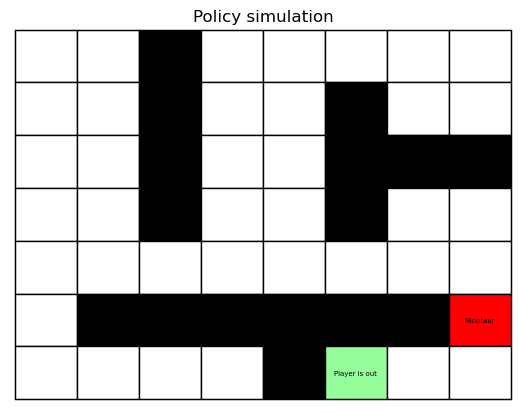

In [6]:
# Show the shortest path 
mz.animate_solution(maze, path, "results/1.c")

### 1.d) Minotaur can stay

In [5]:
def compare_minotaur_can_stay(maze, max_T, n):
    env1 = mz.Maze(maze)
    env2 = mz.Maze(maze, minotaur_can_stay=True)

    outcomes = []
    for T in range(1, max_T+1):

        V, policy = mz.dynamic_programming(env1, T)
        n_win, n_eaten, n_else = monte_carlo(env1, policy, n)
        p_1 = [n_win, n_eaten, n_else]

        V, policy = mz.dynamic_programming(env2,T)
        n_win, n_eaten, n_else = monte_carlo(env2, policy, n)
        p_2 = [n_win, n_eaten, n_else]

        outcomes.append([p_1, p_2])
    return np.array(outcomes) / n

In [46]:
horizon = 20
outcomes = compare_minotaur_can_stay(maze, 30, 100)

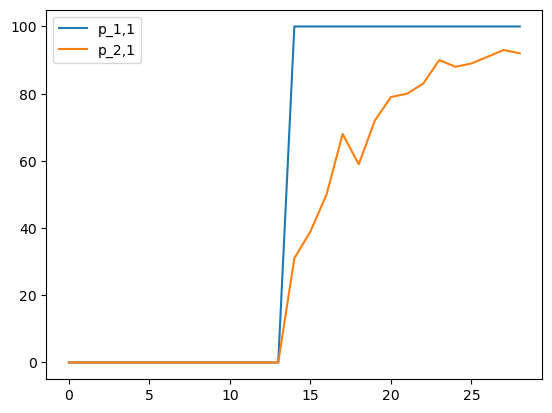

In [52]:
import matplotlib.pyplot as plt
for i in range(2):
    j = 0
    plt.plot(outcomes[:,i,j], label="p_{},{}".format(i+1, j+1))
plt.legend()
plt.show()

In [13]:
import tqdm
def compare_envs(envs, max_T, n):
    outcomes = []
    for T in tqdm.tqdm(range(1, max_T+1)):
        p_s = []

        for env in envs:
            V, policy = mz.dynamic_programming(env, T)
            p = monte_carlo(env, policy, n)
            p_s.append(p)
        outcomes.append(p_s)

    return np.array(outcomes)

In [14]:
env1 = mz.Maze(maze)
env3 = mz.Maze(maze, simultaneous=False)
env2 = mz.Maze(maze, minotaur_can_stay=True)
env4 = mz.Maze(maze, simultaneous=False, minotaur_can_stay=True)
envs = [env1, env2, env3, env4]
names = ["normal", "turns", "minotaur can stay", "turns and minotaur can stay"]

In [15]:
outcomes = compare_envs(envs, 30, 1000)

100%|██████████| 30/30 [12:45<00:00, 25.53s/it]


In [16]:
def plot_outcomes(outcomes, names):
    for i in range(len(names)):
        plt.plot(outcomes[:,i], label=names[i])
    plt.xlabel("horizon")
    plt.ylabel("probability of winning")
    plt.title("Probability of winning for different environments")
    plt.legend()
    # plt.show()
    plt.savefig("1.b.pdf")

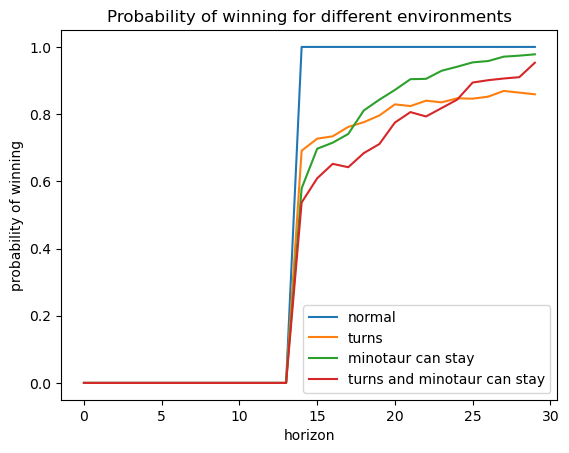

In [17]:
import matplotlib.pyplot as plt
plot_outcomes(outcomes, names)

## Value Iteration

Here we solve the discounted infinite-horizon MDP problem using value iteration, the objective here is to find a stationary policy $\pi$ that minimizes the infinite horizon objective with a discount factor $\gamma$ 
$$
    \mathbb{E} \Big[\sum_{t=0}^\infty \gamma^t r\big(s_t, \pi(s_t)\big) \Big].
$$
Recall the Bellman equation in the case of a stationary policy $\pi$ 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V^*(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V^*(s') \Big\rbrace
\end{equation}
or equivalently in terms of the Bellman operator $\mathcal{L}$ 
\begin{equation}
V^* =  \mathcal{L}(V^*)
\end{equation}
where 
\begin{equation}
   \forall s \in \mathcal{S} \qquad  \mathcal{L}(V)(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V(s') \Big\rbrace. 
\end{equation}
Value iteration solves the Bellman equation described above. This method is implemented as `maze.value_iteration` in the file [maze.py]().

> **Note:** Recall that the mapping $\mathcal{L}$ is a contraction, therefore value iteration converges. To achieve an $\varepsilon>0$ approximation (i.e. $\Vert V^* - V_{n+1} \Vert \le \varepsilon$),
 the stopping criterion of value iteration is $\Vert V - \mathcal{L}(V) \Vert < \frac{1-\gamma}{\gamma}\varepsilon$.

### 1.e)
We model dying from poison as the minotaur being teleported to the curent player position. Let $m$ be the mean of the geometric distribution. Then $\theta=\frac{1}{m}$ is the probability to die from poison at each step. Let $p(s'|s,a)$ be the probability distribution from before. Construct a new probability distribution $q(s'|s,a)$ from it as follows:
- If at state $s$ the player is either eaten or at the exit, let $q(s'|s,a)=p(s'|s,a)$ as before, for all actions $a$ and states $s'$.
- Else, if at state $s=((i,j),(k,l))$, let $s'=((i,j),(i,j))$ be the state where the minotaur was just teleported to the player's position. Then, for all actions $a$ let $q(s'|s,a)=(1-\theta)p(s'|s,a) + \theta$ and for all states $s''\ne s'$ let $q(s''|s,a)=(1-\theta)p(s''|s,a)$.

We chose to model dying from poison as the minotaur being teleported to the curent player position because this way we don't have to add new states.

In [22]:
poison = 1/30
env_poison = mz.Maze(maze, poison_prob=poison)
env = mz.Maze(maze, poison_prob=0)
# Discount Factor
gamma   = 1 - poison;
# Accuracy treshold
epsilon = 0.001;

In [23]:
V_1, policy_1 = mz.value_iteration(env, gamma, epsilon)

In [24]:
V_2, policy_2 = mz.value_iteration(env_poison, gamma, epsilon)

In [25]:
V_3, policy_3 = mz.value_iteration(env_poison, 1, epsilon)

In [46]:
start_state = (0,0),(6,5)
print(V_1[env.map[start_state]], V_2[env.map[start_state]], V_3[env.map[start_state]])
win_state = (6,5), (0,0)
print(V_1[env.map[win_state]], V_2[env.map[win_state]], V_3[env.map[win_state]])

18.007412349460697 10.829351672522987 111.25585511883682
29.965922330189862 29.965922330189862 200.0


In [10]:
method = 'ValIter';
start  = (0,0);
path = env.simulate(start, policy, method)
path

[((0, 0), (6, 5)),
 ((0, 1), (6, 6)),
 ((1, 1), (6, 7)),
 ((2, 1), (5, 7)),
 ((2, 1), (2, 1)),
 ((2, 1), (2, 1))]

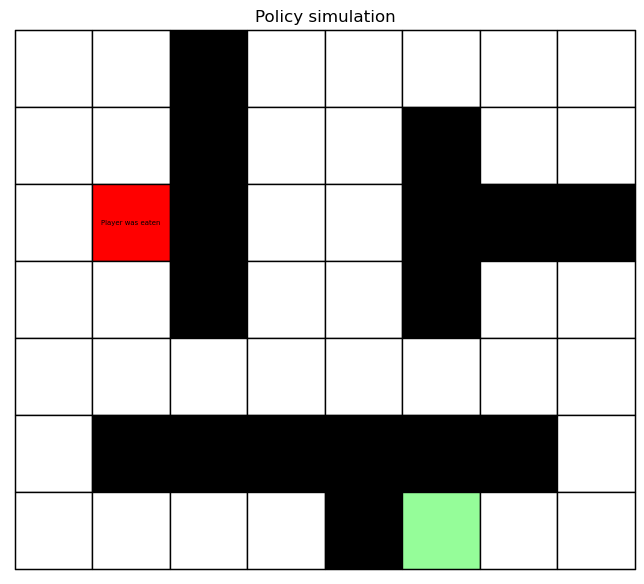

In [11]:
# Show the shortest path 
mz.animate_solution(maze, path)

### 1.f)

In [42]:
def monte_carlo_success(env, policy, N = 10000):
    method = 'ValIter';
    n_win = 0
    for _ in range(N):
        path = env.simulate(start, policy, method)
        end_state = env.map[path[-1]]
        if env.win(end_state):
            n_win += 1
    p_win = n_win / N
    return (p_win)

In [43]:
print(monte_carlo_success(env_poison, policy_1))
print(monte_carlo_success(env_poison, policy_2))
print(monte_carlo_success(env_poison, policy_3))

0.5986
0.5926
0.5976


## Additional Questions

### 1.g) Theoretical questions

#### 1) What does it mean that a learning algorithm is on-policy or off-policy?

- Off-policy: An off-policy learner learns the value of the optimal policy independently of the agent’s actions.
The policy used by the agent is often referred to as the behavior policy, and denoted by $\pi_b$.
- On-policy: An on-policy learner learns the value of the policy being carried out by the agent. The policy used by the agent is computed from the previous collected data. It is an active learning method as the gathered data is controlled.

#### 2) State the convergence conditions for Q-Learning and SARSA.

(Look at the report))

### 1.h)

#### Minotaur moves towards player with some probability

For the movements of the minotaur towards the player with probability $\theta=35\%$, the transition probabilities have to be adjusted in the following way: 
Let $p(s'|s,a)$ be the probability distribution from before. Construct a new probability distribution $q(s'|s,a)$ from it as follows:
- If at state $s$ the player is either eaten or at the exit, let $q(s'|s,a)=p(s'|s,a)$ as before, for all actions $a$ and states $s'$.
- For all the states $s=((i,j),(k,l))$, in which we are neither eaten nor at the exit ($B\ne (i,j)\ne (k,l)$), and actions $a$, let $s'$ be the state where the player has moved according to his action and the minotaur has moved towards him/her (in the simultaneous case this would probably be towards the position where the player was before he/she took his/her action). Then, let $q(s'|s,a)=(1-\theta)p(s'|s,a) + \theta$ and for all states $s''\ne s'$ let $q(s''|s,a)=(1-\theta)p(s''|s,a)$.

#### Player needs keys

For the modified problem with keys at some position $C$, we can add a boolean to each state to signal whether the keys were already picked up. I.e., $S=S_{old}\times \{0,1\} = \{(s,b):s\in S_{old},b\in \{0,1\}\}$, where $S_{old}$ is the state space from before.

The transition probabilities need to be updated such that in a state, the player will only have exited when he/she is at the exit but not eaten, but additionally he/she needs to have the keys. Additionally, the player needs to be able to get the keys, thus we need to transition from not having the key to having the key, when the player currently does not have the key but after taking its action lands on $C$.

More formally, let's construct $q((s',b')|(s,b),a)$ from $p(s'|s,a)$ as before. For state $(s,b)=(((i,j),(k,l)),b)$, action $a$ and the following state $(s',b')=(((i',j'),(k',l')),b')$, 
- if $b=b'=1$, the situation is equivalent to the enviroment without key, thus $q((s',1)|(s,1),a)=p(s'|s,a)$
- if $b=0$, also let $q((s',0)|(s,0),a)=p(s'|s,a)$ except for the following exceptions:
    - the player cannot win yet when moving onto the exit $B$, thus, if $B=(i,j)\ne (k,l)$, with action $a$ and if $(i',j')$ is the new position according to $a$ and $k',l'$ is one of $n$ possible new positions of the minotaur, then $q((s',0)|(s,0),a) = \frac{1}{n}$ (and then adjust it according to the adjusted minotaur movements as before).
    - when going to $C$ without having the key ($b=0$), we pick up the key ($b'=1$), thus, if $(i',j')=C$, then $q((s',1)|(s,0),a)=p(s'|s,a)$.